# Target Calculation

In [135]:
import numpy as np
import pandas as pd
from scipy.ndimage.interpolation import shift
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt

In [136]:
# DF = pd.read_csv(r'train.csv')

In [137]:
# for val in DF.Asset_ID.unique():
#     print(val)
#     DF[DF.Asset_ID==val].sort_values(by=['timestamp'],ascending=True).to_csv(r'splitdata\Asset'+str(val)+'.csv',index=None)

In [138]:
#del DF

In [139]:
_ = pd.read_csv(r'splitdata/Asset1.csv')

In [140]:
DF = _.copy(deep=True)
del _

In [141]:
DF[['timestamp','Asset_ID','Close','Target']]

,timestamp,Asset_ID,Close,Target
0,1514764860,1,13850.176000,-0.014643
1,1514764920,1,13828.102000,-0.015037
2,1514764980,1,13801.314000,-0.010309
3,1514765040,1,13768.040000,-0.008999
4,1514765100,1,13724.914000,-0.008079
...,...,...,...,...
1956277,1632182160,1,42899.012857,NaN
1956278,1632182220,1,42860.005714,NaN
1956279,1632182280,1,42827.020000,NaN
1956280,1632182340,1,43017.277143,NaN


In [142]:
np.array(DF.Close)

array([13850.176     , 13828.102     , 13801.314     , ...,
       42827.02      , 43017.27714286, 43002.505     ])

In [143]:
shift(DF.Close,-16,cval=np.NaN)

array([13625.614, 13593.79 , 13626.11 , ...,       nan,       nan,
             nan])

In [144]:
DF['TargetPrice16'] = shift(DF.Close,-16,cval=np.NaN)
DF['TargetPrice1'] = shift(DF.Close,-1,cval=np.NaN)

In [145]:
DF

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,TargetPrice16,TargetPrice1
0,1514764860,1,229.0,13835.194000,14013.800000,13666.11,13850.176000,31.550062,13827.062093,-0.014643,13625.614,13828.102000
1,1514764920,1,235.0,13835.036000,14052.300000,13680.00,13828.102000,31.046432,13840.362591,-0.015037,13593.790,13801.314000
2,1514764980,1,528.0,13823.900000,14000.400000,13601.00,13801.314000,55.061820,13806.068014,-0.010309,13626.110,13768.040000
3,1514765040,1,435.0,13802.512000,13999.000000,13576.28,13768.040000,38.780529,13783.598101,-0.008999,13601.400,13724.914000
4,1514765100,1,742.0,13766.000000,13955.900000,13554.44,13724.914000,108.501637,13735.586842,-0.008079,13606.286,13717.112000
...,...,...,...,...,...,...,...,...,...,...,...,...
1956277,1632182160,1,1940.0,42983.780000,43001.850849,42878.26,42899.012857,56.850913,42935.489499,NaN,NaN,42860.005714
1956278,1632182220,1,2026.0,42904.197143,42932.000000,42840.16,42860.005714,80.993326,42879.576084,NaN,NaN,42827.020000
1956279,1632182280,1,1986.0,42859.385714,42887.500000,42797.20,42827.020000,65.677734,42844.090693,NaN,NaN,43017.277143
1956280,1632182340,1,4047.0,42839.012802,43042.160000,42818.10,43017.277143,138.335477,42935.761938,NaN,NaN,43002.505000


In [146]:
DF['Rt'] = np.log10(np.divide(DF['TargetPrice16'],DF['TargetPrice1']))
#DF['Rt'] = np.divide(DF['TargetPrice16'],DF['TargetPrice1'])

In [147]:
DF['Rt']

0         -0.006406
1         -0.006580
2         -0.004500
3         -0.003926
4         -0.003523
             ...   
1956277         NaN
1956278         NaN
1956279         NaN
1956280         NaN
1956281         NaN
Name: Rt, Length: 1956282, dtype: float64

In [148]:
def moving_average(a, n=3):
    a = np.nan_to_num(a,nan=0)
    ret = np.cumsum(a)
    i=0
    finalArr = []
    for v in ret:
        if(i-n<0):
            finalArr.append(v/(i+1))
        else:
            finalArr.append((v-ret[i-n])/n)
        i+=1
    print(ret)
    return finalArr

In [149]:
N=3750
DF['Mt'] = moving_average(np.array(DF['Rt']),n=N)

[-6.40649271e-03 -1.29863730e-02 -1.74866015e-02 ...  7.42911526e+00
  7.42911526e+00  7.42911526e+00]


In [150]:
DF['Mt']

0         -0.006406
1         -0.006493
2         -0.005829
3         -0.005353
4         -0.004987
             ...   
1956277   -0.000216
1956278   -0.000216
1956279   -0.000216
1956280   -0.000216
1956281   -0.000216
Name: Mt, Length: 1956282, dtype: float64

In [151]:
DF

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,TargetPrice16,TargetPrice1,Rt,Mt
0,1514764860,1,229.0,13835.194000,14013.800000,13666.11,13850.176000,31.550062,13827.062093,-0.014643,13625.614,13828.102000,-0.006406,-0.006406
1,1514764920,1,235.0,13835.036000,14052.300000,13680.00,13828.102000,31.046432,13840.362591,-0.015037,13593.790,13801.314000,-0.006580,-0.006493
2,1514764980,1,528.0,13823.900000,14000.400000,13601.00,13801.314000,55.061820,13806.068014,-0.010309,13626.110,13768.040000,-0.004500,-0.005829
3,1514765040,1,435.0,13802.512000,13999.000000,13576.28,13768.040000,38.780529,13783.598101,-0.008999,13601.400,13724.914000,-0.003926,-0.005353
4,1514765100,1,742.0,13766.000000,13955.900000,13554.44,13724.914000,108.501637,13735.586842,-0.008079,13606.286,13717.112000,-0.003523,-0.004987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956277,1632182160,1,1940.0,42983.780000,43001.850849,42878.26,42899.012857,56.850913,42935.489499,NaN,NaN,42860.005714,NaN,-0.000216
1956278,1632182220,1,2026.0,42904.197143,42932.000000,42840.16,42860.005714,80.993326,42879.576084,NaN,NaN,42827.020000,NaN,-0.000216
1956279,1632182280,1,1986.0,42859.385714,42887.500000,42797.20,42827.020000,65.677734,42844.090693,NaN,NaN,43017.277143,NaN,-0.000216
1956280,1632182340,1,4047.0,42839.012802,43042.160000,42818.10,43017.277143,138.335477,42935.761938,NaN,NaN,43002.505000,NaN,-0.000216


In [152]:
def ResidualizeMarket(df, mktColumn, window):
  if mktColumn not in df.columns:
    return df

  mkt = df[mktColumn]

  num = df.multiply(mkt.values, axis=0).rolling(window).mean().values  #numerator of linear regression coefficient
  denom = mkt.multiply(mkt.values, axis=0).rolling(window).mean().values  #denominator of linear regression coefficient
  beta = np.nan_to_num( num.T / denom, nan=0., posinf=0., neginf=0.)  #if regression fell over, use beta of 0

  resultRet = df - (beta * mkt.values).T  #perform residualization
  resultBeta = 0.*df + beta.T  #shape beta

  return resultRet.drop(columns=[mktColumn]), resultBeta.drop(columns=[mktColumn])

In [153]:
M,Nt = ResidualizeMarket(DF,'Mt',3750)
DF['Rt'] = M['Rt'].copy()
DF['B'] = Nt['Rt'].copy()

In [154]:
Nt

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,TargetPrice16,TargetPrice1,Rt
0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.000000e+00,0.0
1,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.000000e+00,0.0
2,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.000000e+00,0.0
3,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.000000e+00,0.0
4,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956277,-1.106217e+13,-6777.639192,-2.089074e+07,-2.980646e+08,-2.984152e+08,-2.976718e+08,-2.980421e+08,-854333.444153,-2.980420e+08,NaN,NaN,-2.980189e+08,NaN
1956278,-1.105694e+13,-6774.435357,-2.086969e+07,-2.979179e+08,-2.982681e+08,-2.975253e+08,-2.978951e+08,-853442.013973,-2.978952e+08,NaN,NaN,-2.978716e+08,NaN
1956279,-1.105174e+13,-6771.250118,-2.084854e+07,-2.977717e+08,-2.981215e+08,-2.973792e+08,-2.977487e+08,-852428.714113,-2.977488e+08,NaN,NaN,-2.977268e+08,NaN
1956280,-1.104659e+13,-6768.089485,-2.084585e+07,-2.976264e+08,-2.979774e+08,-2.972345e+08,-2.976050e+08,-852058.261925,-2.976044e+08,NaN,NaN,-2.975831e+08,NaN


In [155]:
DF['TargetCalc'] = DF['Rt'] - DF['B']*DF['Mt']

In [156]:
DF[['Target','TargetCalc']]

,Target,TargetCalc
0,-0.014643,-0.006406
1,-0.015037,-0.006580
2,-0.010309,-0.004500
3,-0.008999,-0.003926
4,-0.008079,-0.003523
...,...,...
1956277,NaN,NaN
1956278,NaN,NaN
1956279,NaN,NaN
1956280,NaN,NaN


In [157]:
DF['DiffError'] = np.abs(DF['TargetCalc'] - DF['Target'])

In [158]:
DF[['TargetCalc','Target','DiffError']].head(20)

,TargetCalc,Target,DiffError
0,-0.006406,-0.014643,0.008237
1,-0.006580,-0.015037,0.008457
2,-0.004500,-0.010309,0.005808
3,-0.003926,-0.008999,0.005073
4,-0.003523,-0.008079,0.004556
5,-0.001925,-0.004422,0.002497
6,-0.003871,-0.008873,0.005002
7,-0.003704,-0.008492,0.004788
8,-0.002737,-0.006282,0.003545
9,-0.001692,-0.003889,0.002197


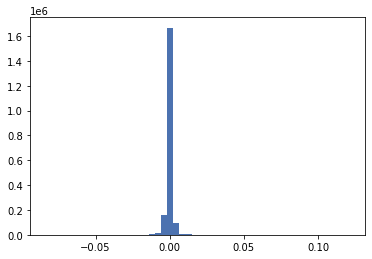

In [159]:
plt.hist(DF['TargetCalc'],bins=50)
plt.show()

In [160]:
np.abs(DF['DiffError'])/1956282

0          4.210401e-09
1          4.322822e-09
2          2.969116e-09
3          2.593305e-09
4          2.329065e-09
               ...     
1956277             NaN
1956278             NaN
1956279             NaN
1956280             NaN
1956281             NaN
Name: DiffError, Length: 1956282, dtype: float64

In [161]:
DF['DiffError'].describe()

count    1.955978e+06
mean     1.275643e-03
std      1.666309e-03
min      5.947388e-10
25%      3.519996e-04
50%      8.023943e-04
75%      1.602845e-03
max      1.151629e-01
Name: DiffError, dtype: float64

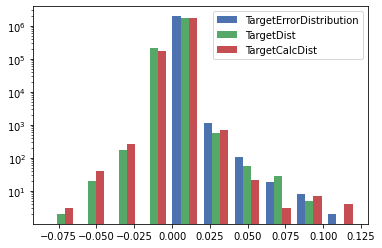

In [162]:
#noise = np.random.normal(0, 1, (1000, ))
import scipy.stats as stats
TargetCalcErrorDist = np.nan_to_num(DF['DiffError'], nan=0.0, posinf=0.0, neginf=0.0)
TargetDist = np.nan_to_num(DF['Target'], nan=0.0, posinf=0.0, neginf=0.0)
TargetCalcDist = np.nan_to_num(DF['TargetCalc'], nan=0.0, posinf=0.0, neginf=0.0)
#density = stats.gaussian_kde(TargetCalcDist)
# n, xtc, _ = plt.hist(TargetCalcDist, bins=np.linspace(-0.1, 0.1, 1000), 
#                    histtype=u'step', density=True)  
#plt.plot(density(xtc),label=('Target Error Calc'))
plt.style.use('seaborn-deep')
plt.hist([TargetCalcErrorDist,TargetDist,TargetCalcDist],
bins=10,
label=['TargetErrorDistribution','TargetDist','TargetCalcDist'])
#---
plt.yscale('log')
plt.legend()
plt.show()

In [163]:
from scipy.stats import ttest_ind
ttest_ind(TargetCalcDist,TargetDist)

Ttest_indResult(statistic=2.2835576844182826, pvalue=0.0223975924263902)

In [164]:
#ttest_ind(TargetDist,)

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math

In [166]:
# REMOVE THIS LATER
N = 15

In [167]:
DF

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,TargetPrice16,TargetPrice1,Rt,Mt,B,TargetCalc,DiffError
0,1514764860,1,229.0,13835.194000,14013.800000,13666.11,13850.176000,31.550062,13827.062093,-0.014643,13625.614,13828.102000,-0.006406,-0.006406,0.0,-0.006406,0.008237
1,1514764920,1,235.0,13835.036000,14052.300000,13680.00,13828.102000,31.046432,13840.362591,-0.015037,13593.790,13801.314000,-0.006580,-0.006493,0.0,-0.006580,0.008457
2,1514764980,1,528.0,13823.900000,14000.400000,13601.00,13801.314000,55.061820,13806.068014,-0.010309,13626.110,13768.040000,-0.004500,-0.005829,0.0,-0.004500,0.005808
3,1514765040,1,435.0,13802.512000,13999.000000,13576.28,13768.040000,38.780529,13783.598101,-0.008999,13601.400,13724.914000,-0.003926,-0.005353,0.0,-0.003926,0.005073
4,1514765100,1,742.0,13766.000000,13955.900000,13554.44,13724.914000,108.501637,13735.586842,-0.008079,13606.286,13717.112000,-0.003523,-0.004987,0.0,-0.003523,0.004556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956277,1632182160,1,1940.0,42983.780000,43001.850849,42878.26,42899.012857,56.850913,42935.489499,NaN,NaN,42860.005714,NaN,-0.000216,NaN,NaN,NaN
1956278,1632182220,1,2026.0,42904.197143,42932.000000,42840.16,42860.005714,80.993326,42879.576084,NaN,NaN,42827.020000,NaN,-0.000216,NaN,NaN,NaN
1956279,1632182280,1,1986.0,42859.385714,42887.500000,42797.20,42827.020000,65.677734,42844.090693,NaN,NaN,43017.277143,NaN,-0.000216,NaN,NaN,NaN
1956280,1632182340,1,4047.0,42839.012802,43042.160000,42818.10,43017.277143,138.335477,42935.761938,NaN,NaN,43002.505000,NaN,-0.000216,NaN,NaN,NaN


# PART 3

In [168]:
X = DF[['Close','Volume']].copy(deep=True)
Y = DF['TargetPrice1'].copy(deep=True)
X.drop(X.tail(1).index,inplace=True) # drop last 1 row
Y.drop(Y.tail(1).index,inplace=True) # drop last 1 row

In [169]:
X

,Close,Volume
0,13850.176000,31.550062
1,13828.102000,31.046432
2,13801.314000,55.061820
3,13768.040000,38.780529
4,13724.914000,108.501637
...,...,...
1956276,42985.214824,47.701279
1956277,42899.012857,56.850913
1956278,42860.005714,80.993326
1956279,42827.020000,65.677734


In [170]:
Y

0          13828.102000
1          13801.314000
2          13768.040000
3          13724.914000
4          13717.112000
               ...     
1956276    42899.012857
1956277    42860.005714
1956278    42827.020000
1956279    43017.277143
1956280    43002.505000
Name: TargetPrice1, Length: 1956281, dtype: float64

In [171]:
import numpy as np
import pandas as pd
from copy import deepcopy
from sklearn.base import TransformerMixin

class SlidingWindowTransformer(TransformerMixin):
    def __init__(self) -> None:
        super().__init__()

    def _partialTransform(self,X, y=None,NwindowSize=10,col_names=None,force_reshape=False,**fit_params):
        if(col_names!=None):
            assert NwindowSize==len(col_names), "Column Names array should be equal to size of window"
        i=0
        new_arr = []
        X = np.array(X)
        if(force_reshape==True):
            X = np.ravel(X)
        assert X.ndim==1, "Data should be one dimensional, else pass force_reshape=True"
        while(i+NwindowSize<=len(X)):
            new_arr.append(X[i:i+NwindowSize])
            i+=1
        if(col_names==None):
            return np.array(new_arr)
        else:
            DF = pd.DataFrame(np.array(new_arr))
            DF.columns = col_names
            return DF

    def fit_transform(self,X, y=None,NwindowSize=10,col_names=None,col_namePrefix=None,force_reshape=False,**fit_params):
        if(col_namePrefix != None):
            col_names = [(col_namePrefix+str(i)) for i in range(0,NwindowSize)]
        return self._partialTransform(X,y,NwindowSize,col_names,force_reshape,**fit_params)

In [172]:
import sys


In [173]:
sltfm = SlidingWindowTransformer()
DFClose = sltfm.fit_transform(X['Close'],NwindowSize=N+1,col_namePrefix='Close_')
DFVolume = sltfm.fit_transform(X['Volume'],NwindowSize=N,col_namePrefix='Volume_')
Y = DFClose.iloc[:,-1].copy()
Y.name = 'TargetPrice'
DFClose.drop(DFClose.columns[len(DFClose.columns)-1], axis=1, inplace=True)
X = pd.concat([DFClose,DFVolume],axis=1)
# DF = pd.DataFrame()
# iii = 0
# rows = 100
# for i in range(0,len(boo1),rows):
#     DFClose = pd.DataFrame(boo1[i:i+rows],columns=col_namesClose)
#     DFVolume = pd.DataFrame(boo2[i:i+rows],columns=col_namesVol)
#     sys.stdout.write('\r'+str(iii))

In [174]:
DFClose

,Close_0,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,Close_8,Close_9,Close_10,Close_11,Close_12,Close_13,Close_14
0,13850.176000,13828.102000,13801.314000,13768.040000,13724.914000,13717.112000,13670.940000,13721.348000,13720.260000,13719.902000,13706.596000,13690.992000,13696.638000,13697.658000,13678.486000
1,13828.102000,13801.314000,13768.040000,13724.914000,13717.112000,13670.940000,13721.348000,13720.260000,13719.902000,13706.596000,13690.992000,13696.638000,13697.658000,13678.486000,13604.025000
2,13801.314000,13768.040000,13724.914000,13717.112000,13670.940000,13721.348000,13720.260000,13719.902000,13706.596000,13690.992000,13696.638000,13697.658000,13678.486000,13604.025000,13625.614000
3,13768.040000,13724.914000,13717.112000,13670.940000,13721.348000,13720.260000,13719.902000,13706.596000,13690.992000,13696.638000,13697.658000,13678.486000,13604.025000,13625.614000,13593.790000
4,13724.914000,13717.112000,13670.940000,13721.348000,13720.260000,13719.902000,13706.596000,13690.992000,13696.638000,13697.658000,13678.486000,13604.025000,13625.614000,13593.790000,13626.110000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956261,42703.636250,42781.970571,42755.592500,42717.234286,42657.202500,42678.721429,42778.291250,42790.175714,42731.731429,42898.565000,42939.645714,42927.167143,42979.833750,42960.601429,42985.482857
1956262,42781.970571,42755.592500,42717.234286,42657.202500,42678.721429,42778.291250,42790.175714,42731.731429,42898.565000,42939.645714,42927.167143,42979.833750,42960.601429,42985.482857,42985.214824
1956263,42755.592500,42717.234286,42657.202500,42678.721429,42778.291250,42790.175714,42731.731429,42898.565000,42939.645714,42927.167143,42979.833750,42960.601429,42985.482857,42985.214824,42899.012857
1956264,42717.234286,42657.202500,42678.721429,42778.291250,42790.175714,42731.731429,42898.565000,42939.645714,42927.167143,42979.833750,42960.601429,42985.482857,42985.214824,42899.012857,42860.005714


In [175]:
Y

0          13604.025000
1          13625.614000
2          13593.790000
3          13626.110000
4          13601.400000
               ...     
1956261    42985.214824
1956262    42899.012857
1956263    42860.005714
1956264    42827.020000
1956265    43017.277143
Name: TargetPrice, Length: 1956266, dtype: float64

In [176]:
list(range(0,10,4))

[0, 4, 8]

In [177]:
TrainLim = math.ceil(len(DF.index)*0.70)
ValLim = math.ceil(len(DF.index)*0.90)

In [178]:
XTrain = X.iloc[0:TrainLim,:].copy(deep=True)
XVal = X.iloc[TrainLim:ValLim,:].copy(deep=True)
YTrain = Y.iloc[0:TrainLim].copy(deep=True)
YVal = Y.iloc[TrainLim:ValLim].copy(deep=True)
XTest = X.iloc[ValLim:,:].copy(deep=True)
YTest = Y.iloc[ValLim:].copy(deep=True)
pd.DataFrame.to_csv(XTrain,r'model15Data/XTrain.csv',index_label='index')
pd.DataFrame.to_csv(YTrain,r'model15Data/YTrain.csv',index_label='index')
pd.DataFrame.to_csv(XVal,r'model15Data/XVal.csv',index_label='index')
pd.DataFrame.to_csv(YVal,r'model15Data/YVal.csv',index_label='index')
pd.DataFrame.to_csv(XTest,r'model15Data/XTest.csv',index_label='index')
pd.DataFrame.to_csv(YTest,r'model15Data/YTest.csv',index_label='index')
del X,Y,TrainLim,ValLim

In [179]:
XTrain[['Close_12','Close_13','Close_14']]

,Close_12,Close_13,Close_14
0,13696.638000,13697.658000,13678.486000
1,13697.658000,13678.486000,13604.025000
2,13678.486000,13604.025000,13625.614000
3,13604.025000,13625.614000,13593.790000
4,13625.614000,13593.790000,13626.110000
...,...,...,...
1369393,11643.676250,11648.196271,11649.644286
1369394,11648.196271,11649.644286,11650.897143
1369395,11649.644286,11650.897143,11643.940585
1369396,11650.897143,11643.940585,11644.947143


In [180]:
YTrain

0          13604.025000
1          13625.614000
2          13593.790000
3          13626.110000
4          13601.400000
               ...     
1369393    11650.897143
1369394    11643.940585
1369395    11644.947143
1369396    11640.894427
1369397    11640.902999
Name: TargetPrice, Length: 1369398, dtype: float64